# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a dataset and choose a predictive problem that the dataset supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build My DataFrame

* Airbnb NYC "listings" dataset: `airbnbListingsData.csv`

#### Load a Dataset and Save it as a Pandas DataFrame

The code cell below contains the filename *(path + filename)* for the dataset mentioned above.

In the code cell below, I will load the data using `pd.read_csv()` and save it to DataFrame `df`. Then I will inspect the data in the DataFrame using `head()`.

In [2]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define My ML Problem

Next I will formulate my ML Problem.

* **Dataset**: Airbnb NYC Listings Dataset
* **Prediction and Label**:
    * I will be predicting the price of a NYC Airbnb listing
    * The label is the `price` variable which represents the cost of each listing
* **Problem Type**:
    * This is a `supervised learning` problem as the dataset is labeled
        * It contains labeled examples for each listing *(input features and target label)*
    * This is a `regression` problem because `price` is a continuous numerical value
* **Features**: 
    * `room_type`
    * `accommodates`
    * `bathrooms`
    * `bedrooms`
    * `beds`
    * `neighbourhood_group_cleansed`
    * `review_scores_rating`
    * `number_of_reviews`
* **Label**:
    * `price`
* **Problem Significance**: This is an important problem because predicting the price of an Airbnb listing can benefit the host, the Airbnb company, and the guests trying to book an accommodation. Hosts can use the model to price their listings competitively to try to maximize revenue and bookings. Airbnb can use the model to provide pricing suggestions to hosts and help guests find fair, competitive prices for their stays. Guests can use the model to receive fair pricing and deals for listings which ensures customer retention in the platform. Overall, Airbnb can use the model to maximize revenue, improve host and user experience, and allow for a smoother booking process which helps make it a competitive booking platform.  

## Part 3: Understand My Data

The next step is to perform exploratory data analysis. I will inspect and analyze my dataset with my machine learning problem in mind. 

* **Data Preparation Techniques**
    * Remove any unnecessary feature columns from the dataset that will not be useful in predicting the `price`
    * Handle Missing Data
        * Fill in numeric columns with their mean or median depending on circumstances
        * *I do not want to entirely remove missing data as it can result in data loss and bias*
        * *I do not want to entirely remove the columns with missing data as they can potentially provide useful insight when predicting the price*
    * Handle outliers through `winsorization`
    * Perform `one-hot encoding` to turn text data into numerical values
    * Create labeled examples from the dataset
        * *This includes the features and a label*
    * Create a training set and a test set from the labeled examples
    
* **Machine Learning Models**
    * **Linear Regression**: model that predicts a continuous value by using a line of best fit to represent the linear relationship between the input features and the target variable
        * *Data Preparation Technique*: scaling the data
            * Scale the data to ensure all features are on a similar scale so the model's weights are easier to compare
            * Prevents features with larger numerical ranges from dominating the training process and biasing the weights which could lead to inaccurate predictions
    * **Random Forests**: set of decision trees that are trained on random subsets of data and their predictions are averaged
    * **Gradient Boosted Decision Trees (GBDT)**: ensemble method consisting of individual decision trees in which trees are built sequentially where each tree corrects the errors of the previous tree

* **Model Evaluation**
    * **Grid Search**
        * Given a set of predefined hyperparameter values, performing a grid search helps find the best values that will improve the model's performance
            * Uses K-fold cross-validation to choose the best hyperparameter values
            * **K-Fold Cross-Validation**: a technique in which the data is recycled in such a way that every data point is used for training and validation, and the results are averaged to evaluate model performance
                * *Note: the `GridSearchCV` class automatically uses cross-validation to evaluate each combination of hyperparameters as it is built-in scikit-learn's `GridSearchCV`*
    * **Root Mean Squared Error *(RMSE)***
        * Measures how far the model's predictions are from the actual values
        * Lower RMSE values indicate good performance while higher RMSE values indicate poor performance
    * **𝑅2 Score**:
        * Measure of how much variability in the data the model can explain
        * Higher 𝑅2 values indicate good performance while lower 𝑅2 values indicate poor performance

Now that I have understood my data and brainstormed how to solve my ML problem, first I will transform the dataset to only include the label, `price`, and the features that will help me predict the price of each listing.

In [3]:
# Transform the dataset to only include features that help predict the price
features = ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'neighbourhood_group_cleansed', 'review_scores_rating', 'number_of_reviews', 'price']
df = df[features]

Now that I have transformed my dataset to include only the important features, in the next few code cells, I will be inspecting the data.

In [4]:
# Inspect the first 50 rows
df.head(50)

,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_group_cleansed,review_scores_rating,number_of_reviews,price
0,Entire home/apt,1,1.0,NaN,1.0,Manhattan,4.70,48,150.0
1,Entire home/apt,3,1.0,1.0,3.0,Brooklyn,4.45,409,75.0
2,Entire home/apt,4,1.5,2.0,2.0,Brooklyn,5.00,2,275.0
3,Private room,2,1.0,1.0,1.0,Manhattan,4.21,507,68.0
4,Private room,1,1.0,1.0,1.0,Manhattan,4.91,118,75.0
5,Private room,2,1.5,1.0,NaN,Brooklyn,4.70,204,98.0
6,Entire home/apt,3,1.0,NaN,1.0,Brooklyn,4.56,181,89.0
7,Private room,1,1.0,1.0,1.0,Manhattan,4.88,234,62.0
8,Private room,1,1.0,1.0,1.0,Brooklyn,4.86,9,90.0
9,Entire home/apt,4,1.0,1.0,2.0,Brooklyn,4.87,280,199.0


In [5]:
# Display a quick summary of the data (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   room_type                     28022 non-null  object 
 1   accommodates                  28022 non-null  int64  
 2   bathrooms                     28022 non-null  float64
 3   bedrooms                      25104 non-null  float64
 4   beds                          26668 non-null  float64
 5   neighbourhood_group_cleansed  28022 non-null  object 
 6   review_scores_rating          28022 non-null  float64
 7   number_of_reviews             28022 non-null  int64  
 8   price                         28022 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
# Displays the statistics for numeric columns
df.describe()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,number_of_reviews,price
count,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,28022.000000
mean,2.874491,1.142174,1.329708,1.629556,4.683482,31.589965,154.228749
std,1.860251,0.421132,0.700726,1.097104,0.505857,56.299006,140.816605
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,29.000000
25%,2.000000,1.000000,1.000000,1.000000,4.600000,3.000000,70.000000
50%,2.000000,1.000000,1.000000,1.000000,4.830000,9.000000,115.000000
75%,4.000000,1.000000,1.000000,2.000000,5.000000,33.000000,180.000000
max,16.000000,8.000000,12.000000,21.000000,5.000000,1009.000000,1000.000000


 Now that I have finished transforming and inspecting the dataset, I will now be handling any missing values in the dataset. First I will check to see if any columns in the dataset have missing values. If so, I will also inspect the number of missing values those columns have.

In [7]:
# Check which columns have missing values and how many of those values are missing
df.isnull().sum()

room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                        2918
beds                            1354
neighbourhood_group_cleansed       0
review_scores_rating               0
number_of_reviews                  0
price                              0
dtype: int64

Now that I know which columns contain missing data and how much, I will now visualize the columns that have missing data with a `histogram` to determine if I should replace the values with the `mean` or the `median`. 

*The mean is often ideal for data that is normally distributed, is not skewed, and has no outliers. Median on the other hand is generally ideal for skewed data.*

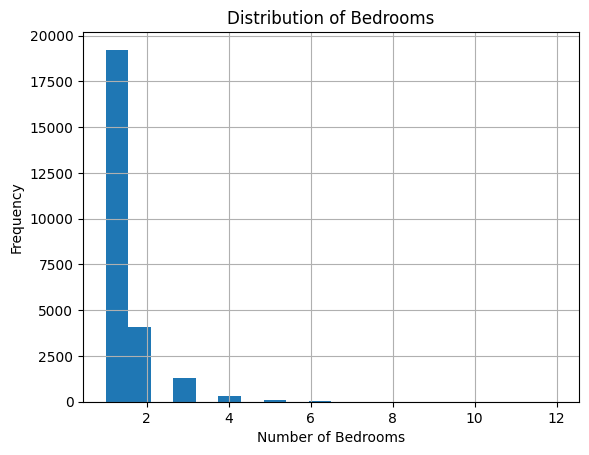

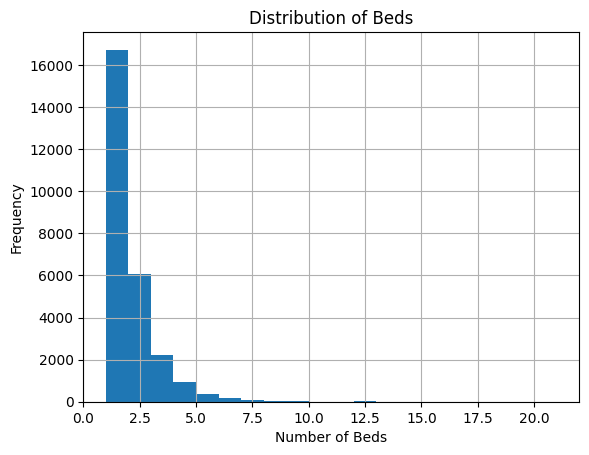

In [8]:
df['bedrooms'].hist(bins=20)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

df['beds'].hist(bins=20)
plt.title('Distribution of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Frequency')
plt.show()

Based on the histograms above, I can see that there is a strong right skew in both of the histograms. As a result, I will be replacing the missing data in the `bedrooms` and `beds` columns with the `median` value of each of those columns.

In [9]:
# Fill missing numeric values with the median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

# Inspect the data again to see if the null columns have been replaced
df.isnull().sum()

room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
neighbourhood_group_cleansed    0
review_scores_rating            0
number_of_reviews               0
price                           0
dtype: int64

Now that I have handled the missing data in the dataset, I will now handle outliers. First I will create `box plots` of each numerical data type column to see a visual representation of how the data is laid out. Box plots will help easily identify if the data contains any outliers.

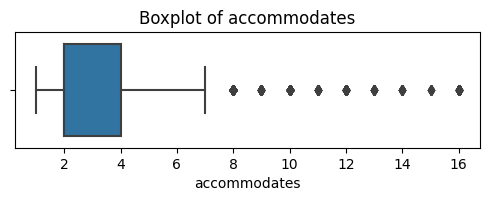

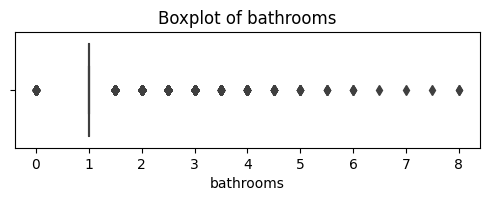

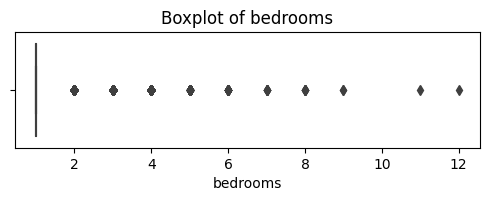

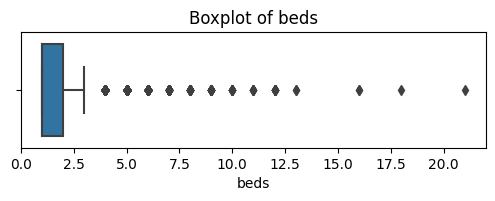

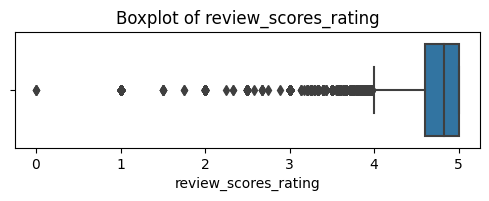

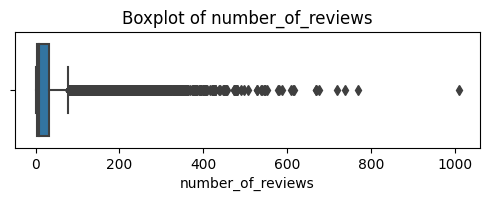

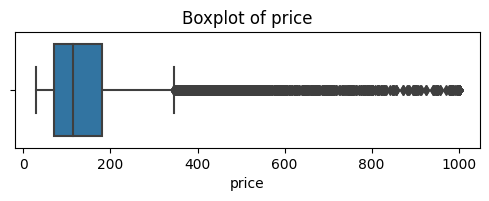

In [10]:
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'price']

for col in cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

As seen above, we can visually identify outliers in each of the numerical data type columns. *The gray dots in each box plot represent the outliers.*
* **Analyzing the box plots**:
    * `accommodates`: listings that accommodate over ~7 people are outliers
    * `bathrooms`: listings that have less than ~1 or more than ~1 bathrooms are outliers
    * `bedrooms`: listings that have more than ~1 bedroom are outliers
    * `beds`: listings that have more than ~3 beds are outliers
    * `review_scores_rating`: listing that have less than ~4  are outliers
    * `number_of_reviews`: listings that have more than ~75 reviews are outliers
    * `price`: listings that are over ~$350 are outliers

Now that I have identified the outliers, I will now handle those outliers using **winsorization**. *Winsorization is a method to identify outliers and then replace those outliers with a high but acceptable value.* I will be winsorizing the dataset by replacing the top and bottom 5% of the outlier values. I am using 5% to cap the most extreme 5% values on each end of the data because as seen in the box plots above, there is a fairly large number of outliers. Using 5% helps reduce the effect of outliers significantly while also keeping the overall shape of the data.

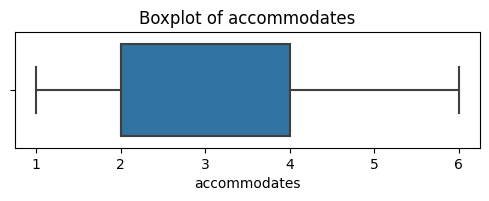

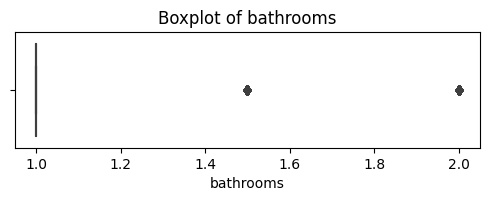

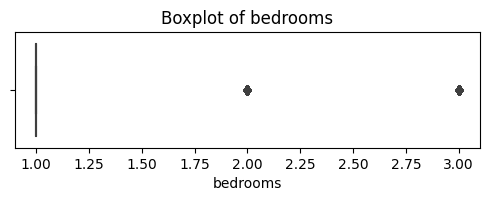

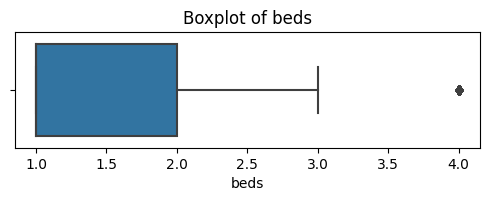

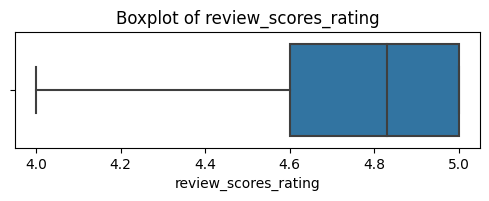

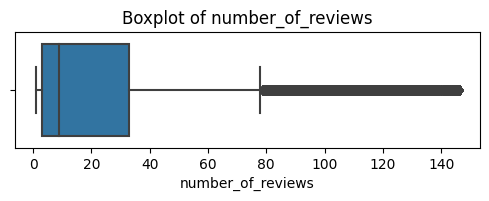

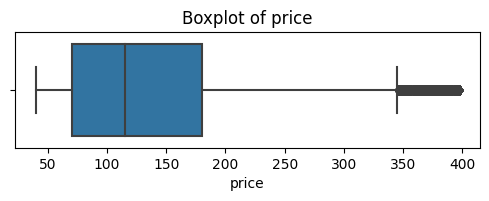

In [11]:
# Make a copy of the original dataset for potential future comparisons
df_winsor = df.copy()

# Winsorize the columns on the copy of the dataset by replacing the top and bottom 5% outlier values
df_winsor['accommodates'] = stats.mstats.winsorize(df['accommodates'], limits=[0.05, 0.05])
df_winsor['bathrooms'] = stats.mstats.winsorize(df['bathrooms'], limits=[0.05, 0.05])
df_winsor['bedrooms'] = stats.mstats.winsorize(df['bedrooms'], limits=[0.05, 0.05])
df_winsor['beds'] = stats.mstats.winsorize(df['beds'], limits=[0.05, 0.05])
df_winsor['review_scores_rating'] = stats.mstats.winsorize(df['review_scores_rating'], limits=[0.05, 0.05])
df_winsor['number_of_reviews'] = stats.mstats.winsorize(df['number_of_reviews'], limits=[0.05, 0.05])
df_winsor['price'] = stats.mstats.winsorize(df['price'], limits=[0.05, 0.05])

# Inspect the box plots again to see if the outliers have been handled
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'price']

for col in cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df_winsor, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

As seen above, compared to the initial box plots, the outliers have been significantly reduced. Now that I have handled the numerical data, I will now handle the categorical data in the following two columns: `room_type` and `neighbourhood_group_cleansed`. To do this, I will use **one-hot encoding**, a method to turn categorical data into numerical values. This method essentially creates a new column for each category and puts a `1` where the category is present and `0` everywhere else.

First let's inspect the unique values in each of the categorical columns since we only care about the distinct types which will help us know which columns will be one-hot encoded.

In [12]:
print("Room types: ", df_winsor['room_type'].unique())
print("Neighborhoods: ", df_winsor['neighbourhood_group_cleansed'].unique())

Room types:  ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
Neighborhoods:  ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


Let's analyze what was just outputted...
* **Room Types**: each listing can contain 1 of 4 room types
* **Neighborhoods**: each listing can be located in 1 of 5 neighborhoods

Now it's time to one-hot encode the `room_type` and the `neighbourhood_group_cleansed` columns. Let's one-hot encode each of the columns one at a time.

In [13]:
# One-hot encode 'room_type'
room_type_encoded = pd.get_dummies(df_winsor['room_type'], prefix='room')

# One-hot encode 'neighbourhood_group_cleansed'
neighborhood_encoded = pd.get_dummies(df_winsor['neighbourhood_group_cleansed'], prefix='neighborhood')

Now that I have one-hot encoded each of the columns, I will add the one-hot encoded columns to the original data frame `df_winsor` and drop the original categorical columns `room_type` and the `neighbourhood_group_cleansed`. This new DataFrame with the one-hot encoded columns added and the original categorical columns dropped will be named `df_encoded`. From here on out, I will be working with `df_encoded`.

In [14]:
df_encoded = pd.concat([df_winsor, room_type_encoded, neighborhood_encoded], axis=1)
df_encoded.drop (['room_type', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

Now let's inspect `df_encoded`. As you can see below, the columns have been one-hot encoded.

In [15]:
df_encoded.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,number_of_reviews,price,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island
0,1,1.0,1.0,1.0,4.70,48,150.0,1,0,0,0,0,0,1,0,0
1,3,1.0,1.0,3.0,4.45,146,75.0,1,0,0,0,0,1,0,0,0
2,4,1.5,2.0,2.0,5.00,2,275.0,1,0,0,0,0,1,0,0,0
3,2,1.0,1.0,1.0,4.21,146,68.0,0,0,1,0,0,0,1,0,0
4,1,1.0,1.0,1.0,4.91,118,75.0,0,0,1,0,0,0,1,0,0


## Part 4: Define My Project Plan

Now that I have understood my data, I am now going to define my plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve my ML problem. 

First let's recap what our feature list now consists of:
* **Feature List**:
    * `accommodates`
    * `bathrooms`
    * `bedrooms`
    * `beds`
    * `review_scores_rating`
    * `number_of_reviews`
    * `price`
    * *One-hot encoded columns*:
        * `room_Entire home/apt`
        * `room_Hotel room`
        * `room_Private room`
        * `room_Shared room`
        * `neighborhood_Bronx`
        * `neighborhood_Brooklyn`
        * `neighborhood_Manhattan`
        * `neighborhood_Queens`
        * `neighborhood_Staten Island`
     
Now let's recap what data preparation techniques I have used to prepare my data for modeling:
* **Data Preparation Techniques**:
    * Removed any features that will not help predict the `price`
    * Missing values in `bedrooms` and `beds` were replaced with median values due to right-skewed distributions
    * Outliers were handled using **winsorization** to cap extreme values at the 5th and 95th percentiles *(top and bottom 5%)*
    * Categorical columns, `room_type` and `neighbourhood_group_cleansed`, were one-hot encoded to convert them into a numerical format

Now that I have recapped my steps so far, let's brainstorm some models that can be useful in solving our ML problem:
* **Models**:
    * Since this problem is a regression problem, I plan to start with a `Linear Regression` model as a baseline model.
    * Then, I will move onto a `Random Forest` model to capture more complex relationships between the input features and the label by using a set of decision trees trained on random subsets of data.
    * Lastly, I will use the `Gradient Boosted Decision Tree` model to take it a step further as that model sequentially builds trees that corrects the errors of the previous tree which would ideally lead to more accurate results than the `Linear Regression` and `Random Forest` model.
 
Lastly, let's brainstorm the training and evaluation phase to solve our ML problem:
* **Training and Evaluation Plan**:
    * `train_test_split()` will create a training and a test set from our labeled examples
    * `model.fit()` fits our various models to the training data
    * `Root Mean Squared Error (RMSE)` and `𝑅2 Score` will be the primary method of evaluating the model's performance.
        * Lower RMSE values indicate good performance while higher RMSE values indicate poor performance
        * Higher 𝑅2 values indicate good performance while lower 𝑅2 values indicate poor performance

## Part 5: Implement My Project Plan

In the code cell below, I will import any additional packages that I will use to implement my project plan.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

To begin my training and evaluation phase, I am first going to create labeled examples from the dataset `df_encoded`. The feature columns will be stored in `X` and the label column will be stored in `y`.

In [17]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

Next, I will create training and test sets from the labeled examples using `train_test_split()` function. The results will be saved in `X_train, X_test, y_train, y_test`. For now, I will follow the default standards for the `test_size` and the `random_state` which is the common 80/20 train test split and a `random_state=42`.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Now that I have created the train and test sets from the dataset, I will now scale the data to ensure all features are on a similar scale and to prevent features with larger numerical ranges from biasing the weights. This is an important step for models such as `Linear Regression` as not scaling the features could cause the model to give too much importance to some features which can lead to inaccurate predictions.

In [19]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the scaler that was fitted on the training data
X_test_scaled = scaler.transform(X_test)

Now that I have scaled the data, it is time to build the `Linear Regression` model.

In [20]:
# Create LinearRegression model 
lr_model = LinearRegression()

# Fit the model to the training data 
lr_model.fit(X_train_scaled, y_train)

#  Make predictions on the test data 
y_lr_pred = lr_model.predict(X_test_scaled)

Now that I have created my model, I will inspect the model parameters that were determined during training. More specifically I will inspect them through the lens of the **weight** of each feature and the **intercept**.

* **Weights?**
    * The weight of each feature essentially tells us how much each feature influences the prediction the model makes
    * Larger weights mean that the feature has a stronger impact on the output and smaller weights mean it has a weaker impact on the output
    * Positive weights mean that the feature increases the prediction and negative weights mean that the feature decreases the prediction
* **Intercept?**
    * Called *alpha*
    * The intercept is the starting point of the prediction when all features are zero
    * The base value before features add or subtract from the prediction

In [21]:
# Print weights and intercept

print("Model Summary\n")

for i in range(len(X.columns)):
    feature_name = X.columns[i]
    weight = lr_model.coef_[i]
    print(feature_name, weight)

print("\nIntercept (alpha):", lr_model.intercept_)

Model Summary

accommodates 28.054726924482054
bathrooms 9.446909614303362
bedrooms 14.481666114663456
beds -0.0035911146374871805
review_scores_rating 5.826648440411107
number_of_reviews -3.411961939276753
room_Entire home/apt 10.355158050719702
room_Hotel room 9.705372704436453
room_Private room -10.901239464555468
room_Shared room -3.5617768724330787
neighborhood_Bronx -5.223951471945888
neighborhood_Brooklyn -6.75284350550748
neighborhood_Manhattan 15.99192529436257
neighborhood_Queens -9.276243408306552
neighborhood_Staten Island -4.309342118558435

Intercept (alpha): 142.75763929160905


Inspecting our results above, we can see which features influence the prediction the most and which have little to no influence. We can also see the base value prediction if our model were to have no features.

* **Most Impactful Features**:
    * `accommodates` (28.05): listings that allow more guests are more expensive
    * `neighborhood_Manhattan` (15.99): listings in Manhattan, NY are much pricier than other neighborhoods
    * `bedrooms` (14.48): more bedrooms in an Airbnb tend to increase the price of a listing

* **Least Impactful Features**:
    * `room_Private room` (-10.90): private rooms lower the price of a listing
    * `neighborhood_Queens` (-9.28): listings in Queens, NY are cheaper than other neighborhoods
    * `neighborhood_Brooklyn` (-6.75): listings in Brooklyn, NY are cheaper than other neighborhoods
 
* **Intercept**:
    * The intercept is ~142.76, which is the predicted price when all feature values are zero. This value is not meaningful in this context as it is very highly unlikely that an Airbnb would have zero features. However, having an idea of the base value prediction is necessary for the model's calculations by adding or subtracting the influence of each feature from this prediction.

Now that we have analyzed the weights and intercepts of our model, I will now calculate the root mean squared error and the 𝑅2 score.

* **Root Mean Squared Error *(RMSE)***
    * Measures how far the model's predictions are from the actual values
    * In our case, measure how far off the predictions for `price` are from the actual `price` of the Airbnb listing
    * Lower RMSE values indicate good performance while higher RMSE values indicate poor performance
 
* **𝑅2 Score**:
    * Measure of how much variability in the data the model can explain
        * In our case, the target variable `price` fluctuates up and down. This is what "variability" is in our data.
        * Essentially the model tries to predict this value
        * 𝑅2 score tells us how much of those ups and downs (variability) the model captures
    * Shows how well the model's predictions match the real data
    * Usually a number between 0 and 1 *(1 implies a perfect model, 0 implies the model explains nothing)*
    * Higher 𝑅2 values indicate good performance while lower 𝑅2 values indicate poor performance

In [22]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))

# Calculate r2 score
r2 = r2_score(y_test, y_lr_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 70.28564586459068
R2 Score: 0.4639540854086216


**Linear Regression Model Analysis**:
* **RMSE**: 70.29
    *  An RMSE value of ~70.29 indicates that on average the model's predicted price is about $70 away from the actual price
    *  Since Airbnb prices can vary, this error may or may not be significant depending on the price range of listings in the dataset
        * For instance, if an Airbnb listing price is 50 dollars, having a model that is about 70 dollars off makes a significant difference than if the listing price was higher like a value such as 500 dollars
    *  In general, a lower RMSE value is better so still there is room for improvement
 
* **𝑅2 Score**: 0.46
    *  An 𝑅2 score of 0.46 indicates that the model explains about 46% of the variation in listing prices
    *  In other words, the model captures less than half of the factors affecting the price which suggests the model is still far from perfect

* **Reflection**:
    * Overall, this model does a decent job of capturing all the relationships in the dataset and predicting the price. Based on the results, using a linear regression model may not be the ideal model as it assumes a linear relationship between the features and the label `price` which may be too simple of a model for this ML problem.

Since we have concluded that a Linear Regression model may be too simple for this ML problem, let's explore other types of models that are available:

* **Decision Trees**: makes predictions by splitting data into groups based on feature values using a tree structure
* **Random Forests**: set of decision trees that are trained on random subsets of data and their predictions are averaged
* **Gradient Boosted Decision Trees (GBDT)**: ensemble method consisting of individual decision trees in which trees are built sequentially where each tree corrects the errors of the previous tree
*  **K-Nearest Neighbors (KNN)**: algorithm that makes predictions about an example based on the labels of other examples near it
*  **Neural Networks**: a class of models that help identify nonlinear relationships in data through utilizing many layers and nodes to visualize and model complex patterns

Now that I have briefly covered a variety of different models that can be used to solve ML problems, I will now decide which models will be the most beneficial to predict the prices of NYC Airbnb listings:
* ***Random Forest*** is one of the models that is ideal for this problem as it is much more complex than a single decision tree as it creates many trees trained on random subsets of data. This method essentially uses the "bagging" process which helps reduce overfitting, allows for better generalization, and captures complex relationships in the data.
    * *Bagging*: a method that trains models on bootstrapped samples and averages their predictions
    * *Bootstrapping*: process of creating many random samples from the original data to train models
    * *Note: bagging is automatically handled inside the Random Forest algorithm implementation as it is built into scikit-learn's `RandomForestRegressor`*
* ***Gradient Boosted Decision Trees*** is another model that is beneficial for this ML problem as it takes it a step further than Random Forest by building trees sequentially where each tree corrects the mistakes of the previous tree. This method focuses on fixing errors and makes GBDT more accurate. 

To begin, I will start with the `Random Forest` implementation. First I will perform a grid search with a predefined set of values for the model's hyperparameters, `max_depth` and `n_estimators`, to find the best combination for optimal performance.

In [23]:
print('Running Grid Search...')

# Define RandomForestRegressor model with no hyperparameters
rf_regressor = RandomForestRegressor()

# Define hyperparameter grid to search
param_grid = {
    'max_depth': [6, 7, 8],
    'n_estimators': [130, 150, 170]
}

# Run a Grid Search with 5-fold cross-validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=5)

# Fit the model to the training data
rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


Now that I have performed a grid search, it is time to reveal the best values for our two hyperparameters, `max_depth` and `n_estimators`.

In [24]:
rf_best_params = rf_grid_search.best_params_
rf_best_params

{'max_depth': 8, 'n_estimators': 170}

Using the above hyperparameters, I will now create a `RandomForestRegressor` model, fit the model to the training data, and lastly use the model to make predictions using the test data.

In [25]:
# Save the best values for the hyperparameters in variables
rf_max_depth_val = rf_best_params['max_depth']
n_estimators_val = rf_best_params['n_estimators']

# Create RandomForestRegressor model
rf_model = RandomForestRegressor(max_depth=8, n_estimators=150)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

#  Make predictions on the test data 
rf_predictions = rf_model.predict(X_test)

Now that I have my model, I will compute the `RMSE` and the `𝑅2 Score` to view the performance of my model.

In [26]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate r2 score
r2 = r2_score(y_test, rf_predictions)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 66.87342435618277
R2 Score: 0.5147385009951249


**Random Forest Model Analysis**:

*Note: the values for RMSE and 𝑅2 may vary from the values noted below because RandomForestRegressor and cross-validation involve randomness*
* **RMSE**: 66.82
    *  An RMSE value of ~66.82 indicates that on average the model's predicted price is about $66 away from the actual price
    *  Since Airbnb prices can vary, this error may or may not be significant depending on the price range of listings in the dataset
    *  In general, a lower RMSE value is better and this RMSE value shows a slight improvement over the Linear Regression model
 
* **𝑅2 Score**: 0.51
    *  An 𝑅2 score of 0.51 indicates that the model explains about 51% of the variation in listing prices
    *  In other words, the model captures a little over half of the factors affecting the price
    *  While this is better than the Linear Regression model *(𝑅2 of 0.46)*, there is still room for improvement

* **Reflection**:
    * Overall, this model performs better than the `Linear Regression` model I initially used. This improvement makes sense since `Random Forest` is a more powerful algorithm that helps capture nonlinear and complex relationships, unlike Linear Regression. Although, it's an improvement, the model is still far from perfect and using a different model could be more beneficial to solve this ML problem.

Now that we have analyzed the results for the `Random Forest` model, I will now move on to the `Gradient Boosted Decision Tree` implementation. Like before, first I will perform a grid search with a predefined set of values for the model's hyperparameters, `max_depth` and `learning_rate`, to find the best combination for optimal performance.

In [27]:
print('Running Grid Search...')

# Define GradientBoostingRegressor model with no hyperparameters
gbdt_regressor = GradientBoostingRegressor()

# Define hyperparameter grid to search
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07]
}

# Run a Grid Search with 5-fold cross-validation 
gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv=5)

# Fit the model to the training data
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


Now that I have performed a grid search, it is time to reveal the best values for our two hyperparameters, `max_depth` and `learning_rate`.

In [28]:
gbdt_best_params = gbdt_grid_search.best_params_
gbdt_best_params

{'learning_rate': 0.05, 'max_depth': 5}

Using the above hyperparameters, I will now create a `GradientBoostingRegressor` model, fit the model to the training data, and lastly use the model to make predictions using the test data.

In [29]:
# Save the best values for the hyperparameters in variables
gbdt_max_depth_val = gbdt_best_params['max_depth']
learning_rate_val = gbdt_best_params['learning_rate']

# Create GradientBoostingRegressor model
gbdt_model = GradientBoostingRegressor(max_depth=5, learning_rate=0.05)

# Fit the model to the training data
gbdt_model.fit(X_train, y_train)

#  Make predictions on the test data 
gbdt_predictions = gbdt_model.predict(X_test)

Now that I have my model, I will compute the `RMSE` and the `𝑅2 Score` to view the performance of my model.

In [30]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, gbdt_predictions))

# Calculate r2 score
r2 = r2_score(y_test, gbdt_predictions)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 66.76835927684928
R2 Score: 0.5162620953908822


**Gradient Boosted Decision Tree Model Analysis**:

*Note: the values for RMSE and 𝑅2 may vary from the values noted below because GradientBoostingRegressor and cross-validation involve randomness*
* **RMSE**: 66.77
    *  An RMSE value of ~66.77 indicates that on average the model's predicted price is about $66 away from the actual price
    *  Since Airbnb prices can vary, this error may or may not be significant depending on the price range of listings in the dataset
    *  This RMSE value is *slightly better* than our Random Forest algorithm, which again shows a slight improvement over the previous model
 
* **𝑅2 Score**: 0.52
    *  An 𝑅2 score of 0.52 indicates that the model explains about 52% of the variation in listing prices
    *  In other words, the model captures a little over half of the factors affecting the price
    *  This 𝑅2 score is nearly identical but *very slightly higher* than the Random Forest 𝑅2 score, showing a small improvement

* **Reflection**:
    * Overall, this model performs slightly better than `Random Forest` and noticeably better than `Linear Regression`. GBDT overall improves model performance by building trees sequentially where each tree corrects the errors made by the previous one allowing the model to learn from its mistakes, become more accurate, and make stronger predictions.

## Conclusion

In this project I have chosen to work with the Airbnb NYC Listings Dataset. My main goal was to build a model that can predict the price of a NYC Airbnb listing. 

Throughout this project, I have explored the different stages of the machine learning life cycle which includes data understanding, data preparation, modeling, and evaluation: 
* **Data and Business Understanding**:
    * I understood my dataset and the type of data I will be working with
    * I have formulated a ML problem with a goal in mind: predict `price`
    * I have analyzed the significance of my ML problem and my goal
        * Hosts can use the model to maximize revenue and bookings
        * Airbnb can use the model to provide pricing suggestions
        * Guests can use the model to receive fair and good pricings
* **Data Preparation**
    * Removed any unnecessary feature columns from dataset
    * Handled missing data through replacing missing data with median values
    * Handled outliers through winsorization
    * Performed one-hot encoding to turn text data into numerical values
    * Created labeled examples from my datasets that included features and a label
    * Created a training set and a test set from my labeled examples using the `train_test_split()` function
* **Modeling**
    * I modeled my data using 3 models
        * `Linear Regression`: uses a line of best fit to predict a continuous value and represent the linear relationship between the input features and the target variable
        * `Random Forest`: set of decision trees trained on random subsets of data and their predictions are averaged
        * `Gradient Boosted Decision Trees`: trees are built sequentially where each tree corrects the errors of the previous tree 

* **Evaluation**
    * I evaluated each of the 3 models by using the `RMSE` value and the `𝑅2` score
        * Lower RMSE values indicate good performance while higher RMSE values indicate poor performance
        * Higher 𝑅2 values indicate good performance while lower 𝑅2 values indicate poor performance
     
* **Reflection**
    * From the models I have built and evaluated, it is safe to conclude that `Gradient Boosted Decision Trees` was the best model for this ML problem. It is still important to note that although `Gradient Boosted Decision Trees` performed the best for this problem, there is still room for improvement. 

* **Improving Model Performance**
    * Tuning hyperparameters values to improve model performance
    * Adding more hyperparameters to improve model accuracy
    * Including more features to capture more relationships to help the model make better predictions
    * *These suggestions should be done with caution as oftentimes adding too many hyperparameters and features could cause the model to overfit, leading to weaker predictions*

Throughout this project, I have learned how to work with a real dataset to create and evaluate predictive models. I now better understand how each step of the machine learning life cycle plays a key role in building a successful model. Most importantly, this valuable learning experience has shown me how machine learning can be used as a powerful tool to solve real-world problems.